In [1]:
"""
Replaced -9 with average
Renormalised all event feature to -1 and 1
removed TTjet and Gjet 
batch sampling according to weights

corrected the minus -9 binning such that average is taken across the entire dataset

plotting the auc scores of training as well as the testing 
plotting the histograms for the training and testing classifiers
"""

'\nReplaced -9 with average\nRenormalised all event feature to -1 and 1\nremoved TTjet and Gjet \nbatch sampling according to weights\n\ncorrected the minus -9 binning such that average is taken across the entire dataset\n\nplotting the auc scores of training as well as the testing \nplotting the histograms for the training and testing classifiers\n'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import mplhep as hep
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import copy
import train_evaluate_GanelsClosest as te
import csv 
import matplotlib.gridspec as gridspec


hep.style.use("CMS")
auclist=[]
device = 'cuda' if torch.cuda.is_available() else 'cpu'


def separate_output_score(output_score,y):
    dict_ = {'pred':output_score.cpu().detach().numpy().flatten(),'true':y}
    temp_df = pd.DataFrame(dict_)
    signal_output_score = temp_df.loc[temp_df['true'] == 1]['pred']
    background_output_score = temp_df.loc[temp_df['true'] == 0]['pred']
    return signal_output_score,background_output_score



C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Early stopping triggered
>> Training finished
Best model at epoch 62 with loss of 5.479289757204242e-05
Printing TRAINING AUC Score:0.9714826391248383 for signal GluGluToRadionToHHTo2G2Tau_M-260 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9706213730273187 for signal GluGluToRadionToHHTo2G2Tau_M-260 of architecture [50, 50, 50]


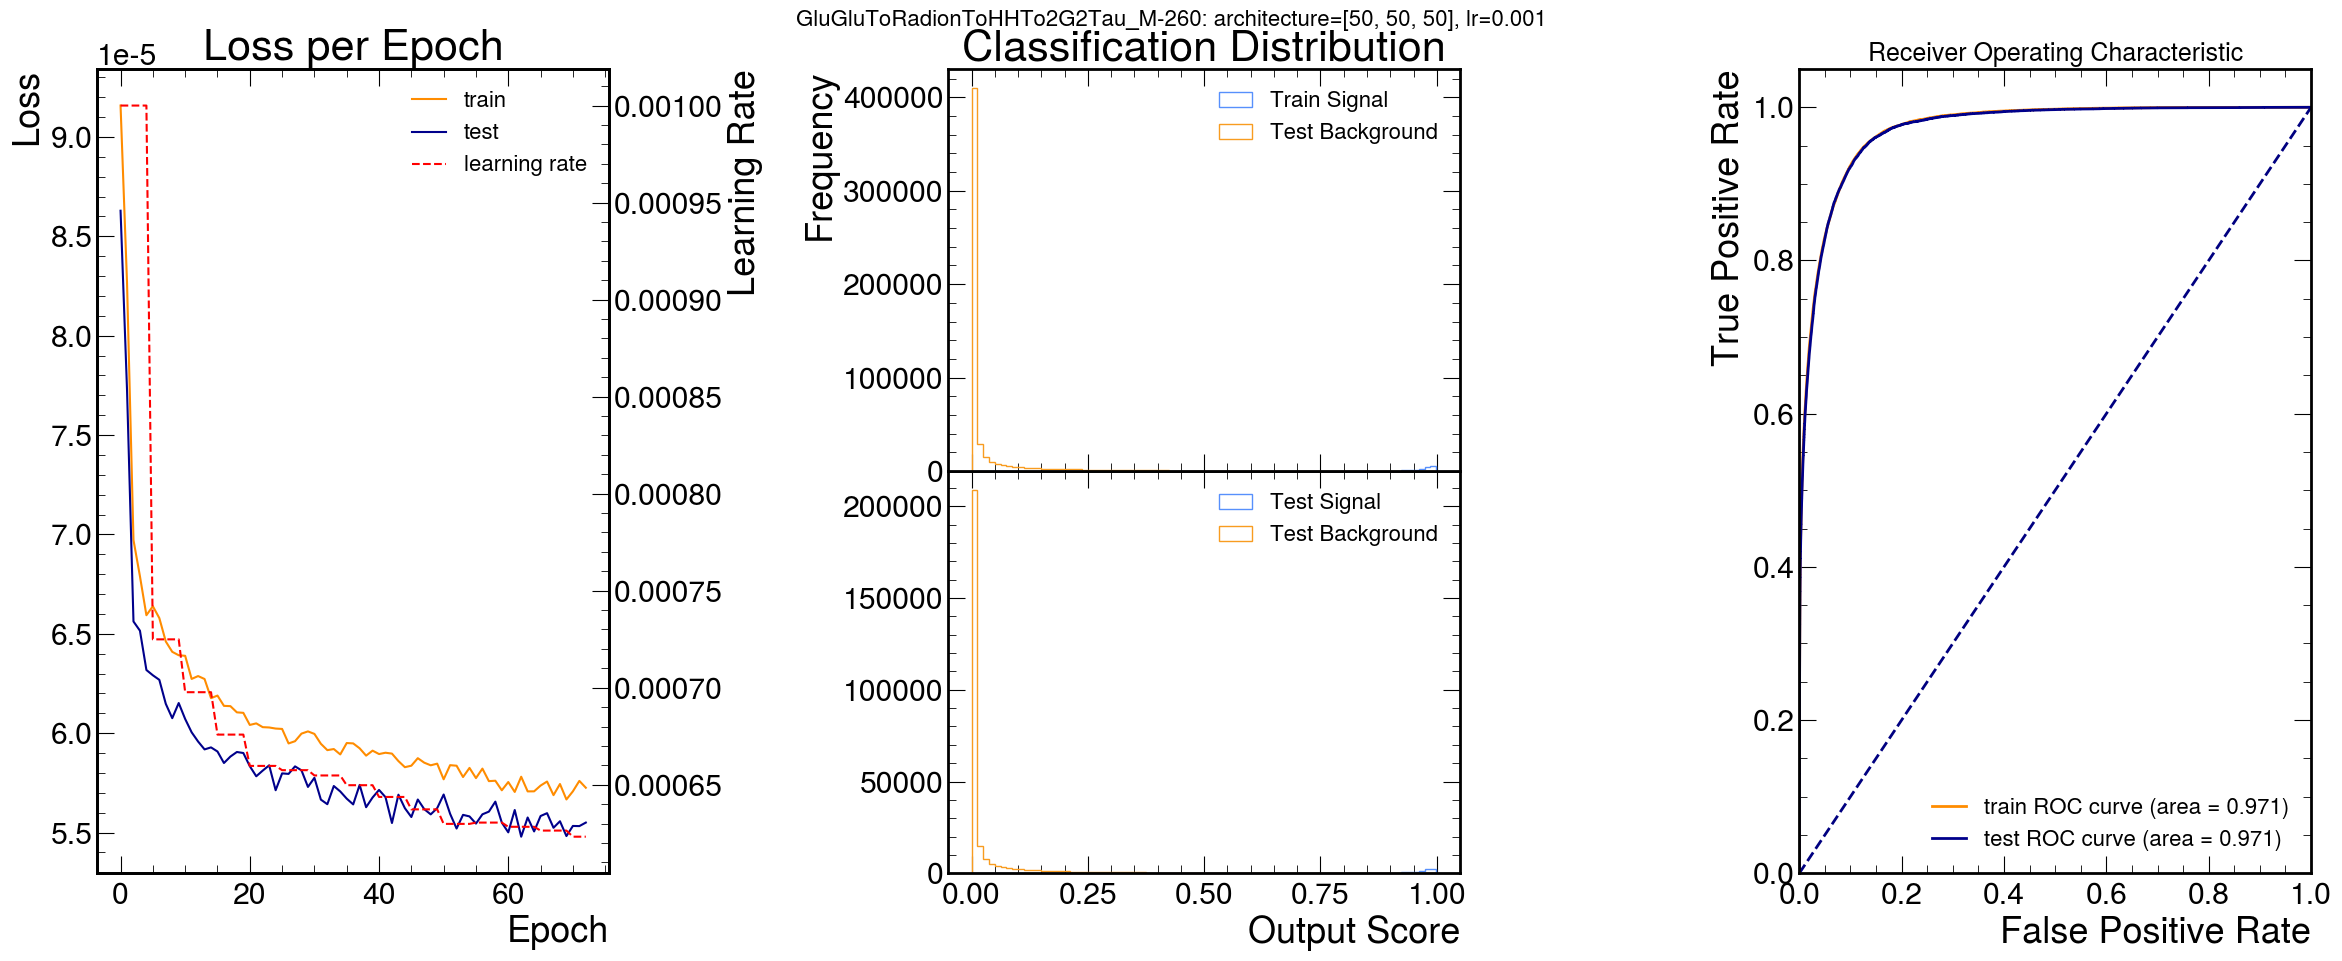

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Epoch: 80
Early stopping triggered
>> Training finished
Best model at epoch 87 with loss of 6.643000233452767e-05
Printing TRAINING AUC Score:0.9622315404847304 for signal GluGluToRadionToHHTo2G2Tau_M-270 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9598759845205325 for signal GluGluToRadionToHHTo2G2Tau_M-270 of architecture [50, 50, 50]


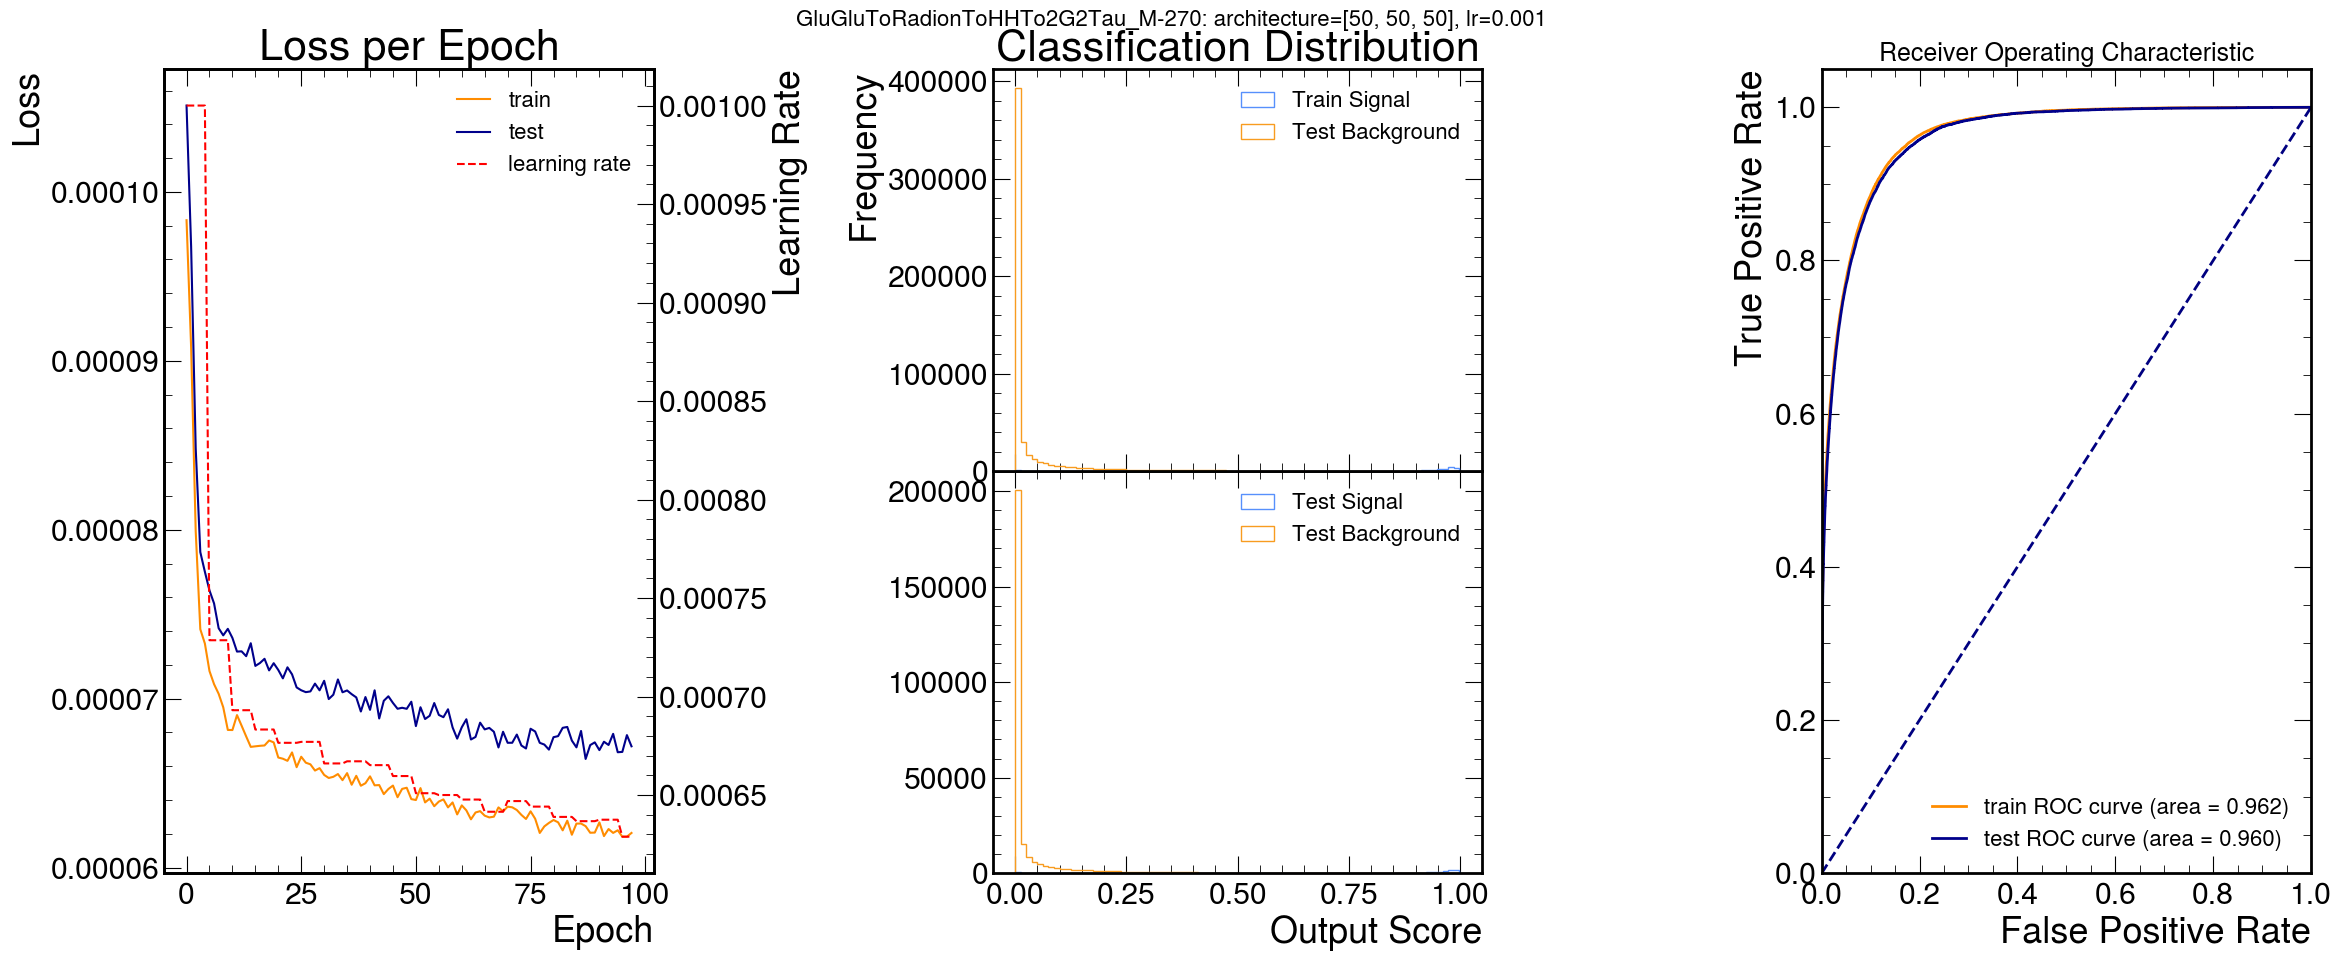

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Early stopping triggered
>> Training finished
Best model at epoch 62 with loss of 6.651238072663546e-05
Printing TRAINING AUC Score:0.9562361189253725 for signal GluGluToRadionToHHTo2G2Tau_M-280 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9542344183420881 for signal GluGluToRadionToHHTo2G2Tau_M-280 of architecture [50, 50, 50]


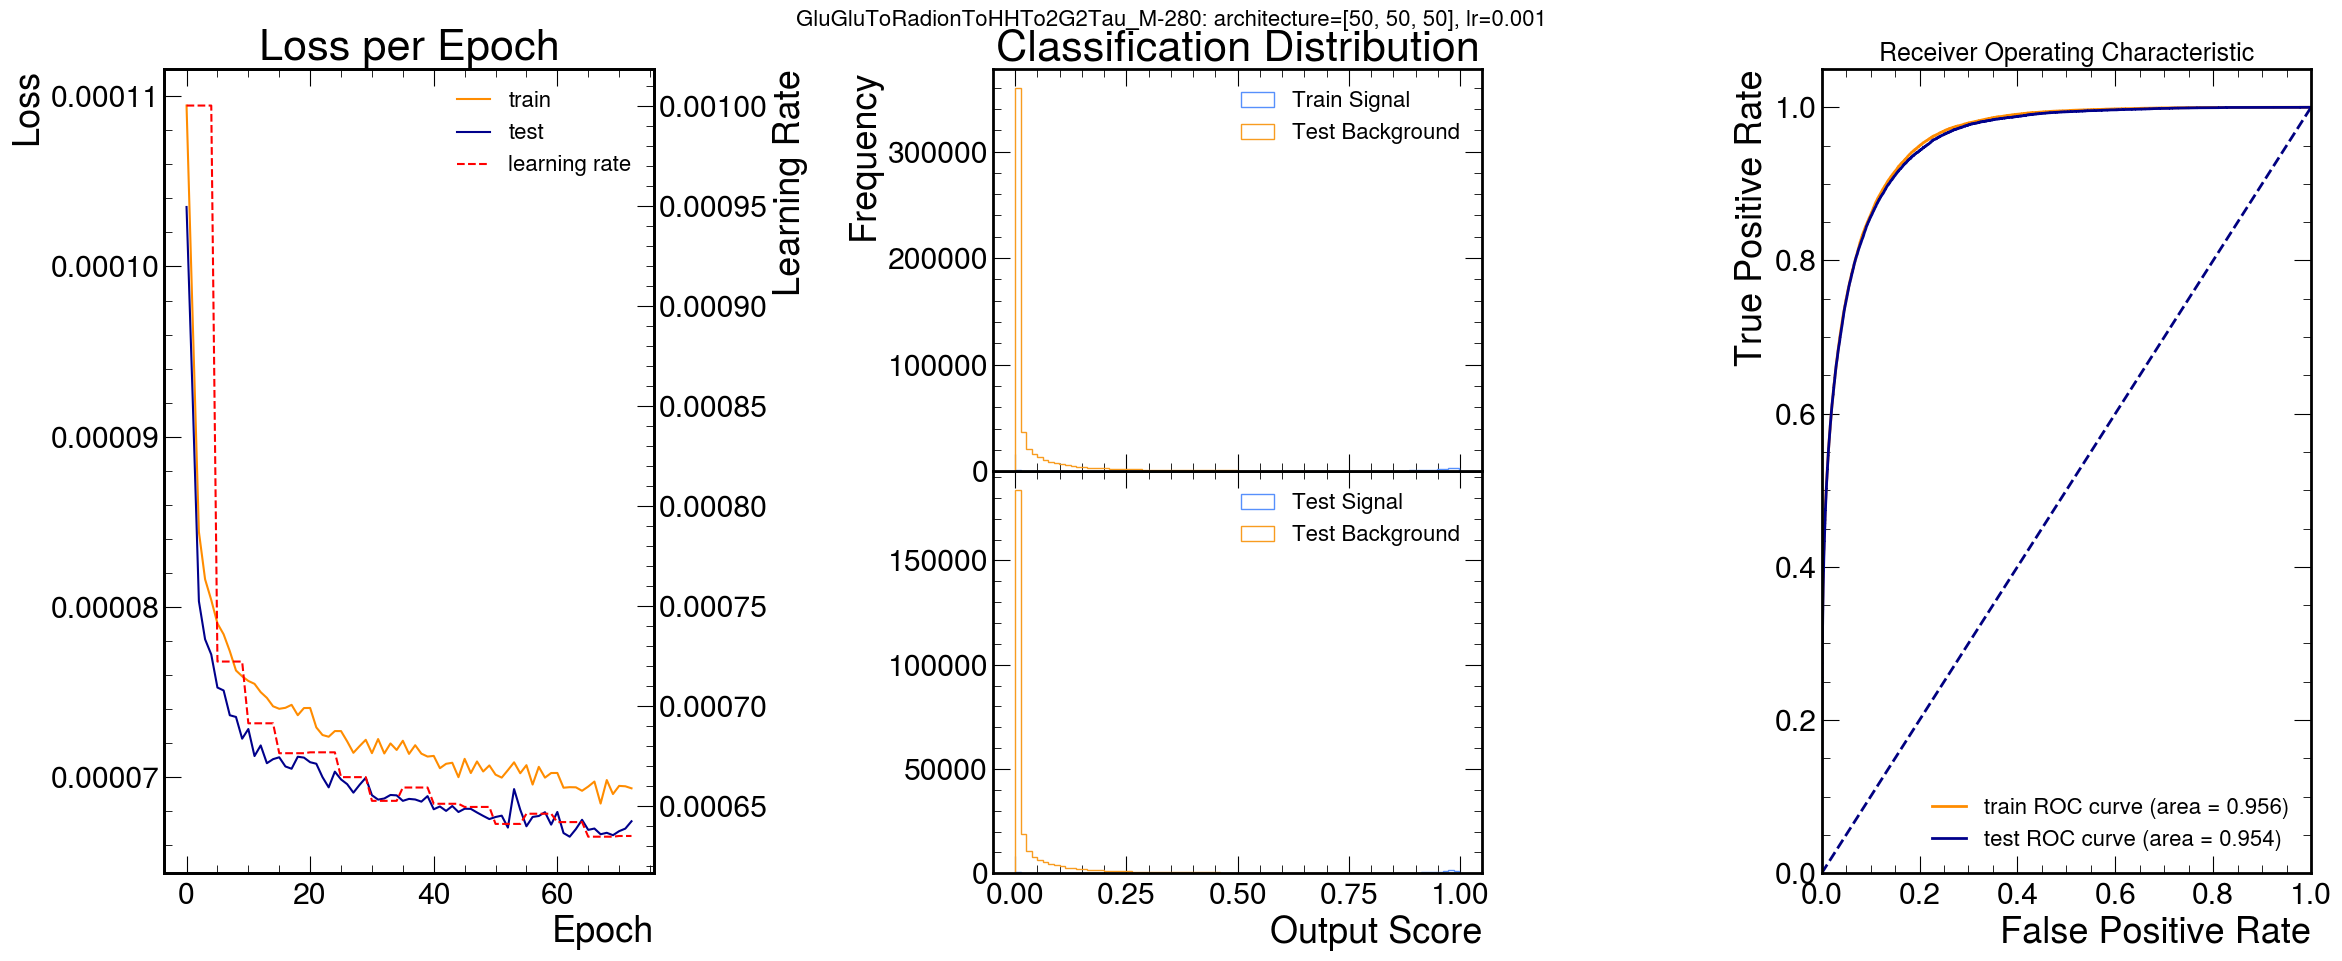

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Early stopping triggered
>> Training finished
Best model at epoch 68 with loss of 7.279753481270745e-05
Printing TRAINING AUC Score:0.9529286504042084 for signal GluGluToRadionToHHTo2G2Tau_M-290 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9509057943919362 for signal GluGluToRadionToHHTo2G2Tau_M-290 of architecture [50, 50, 50]


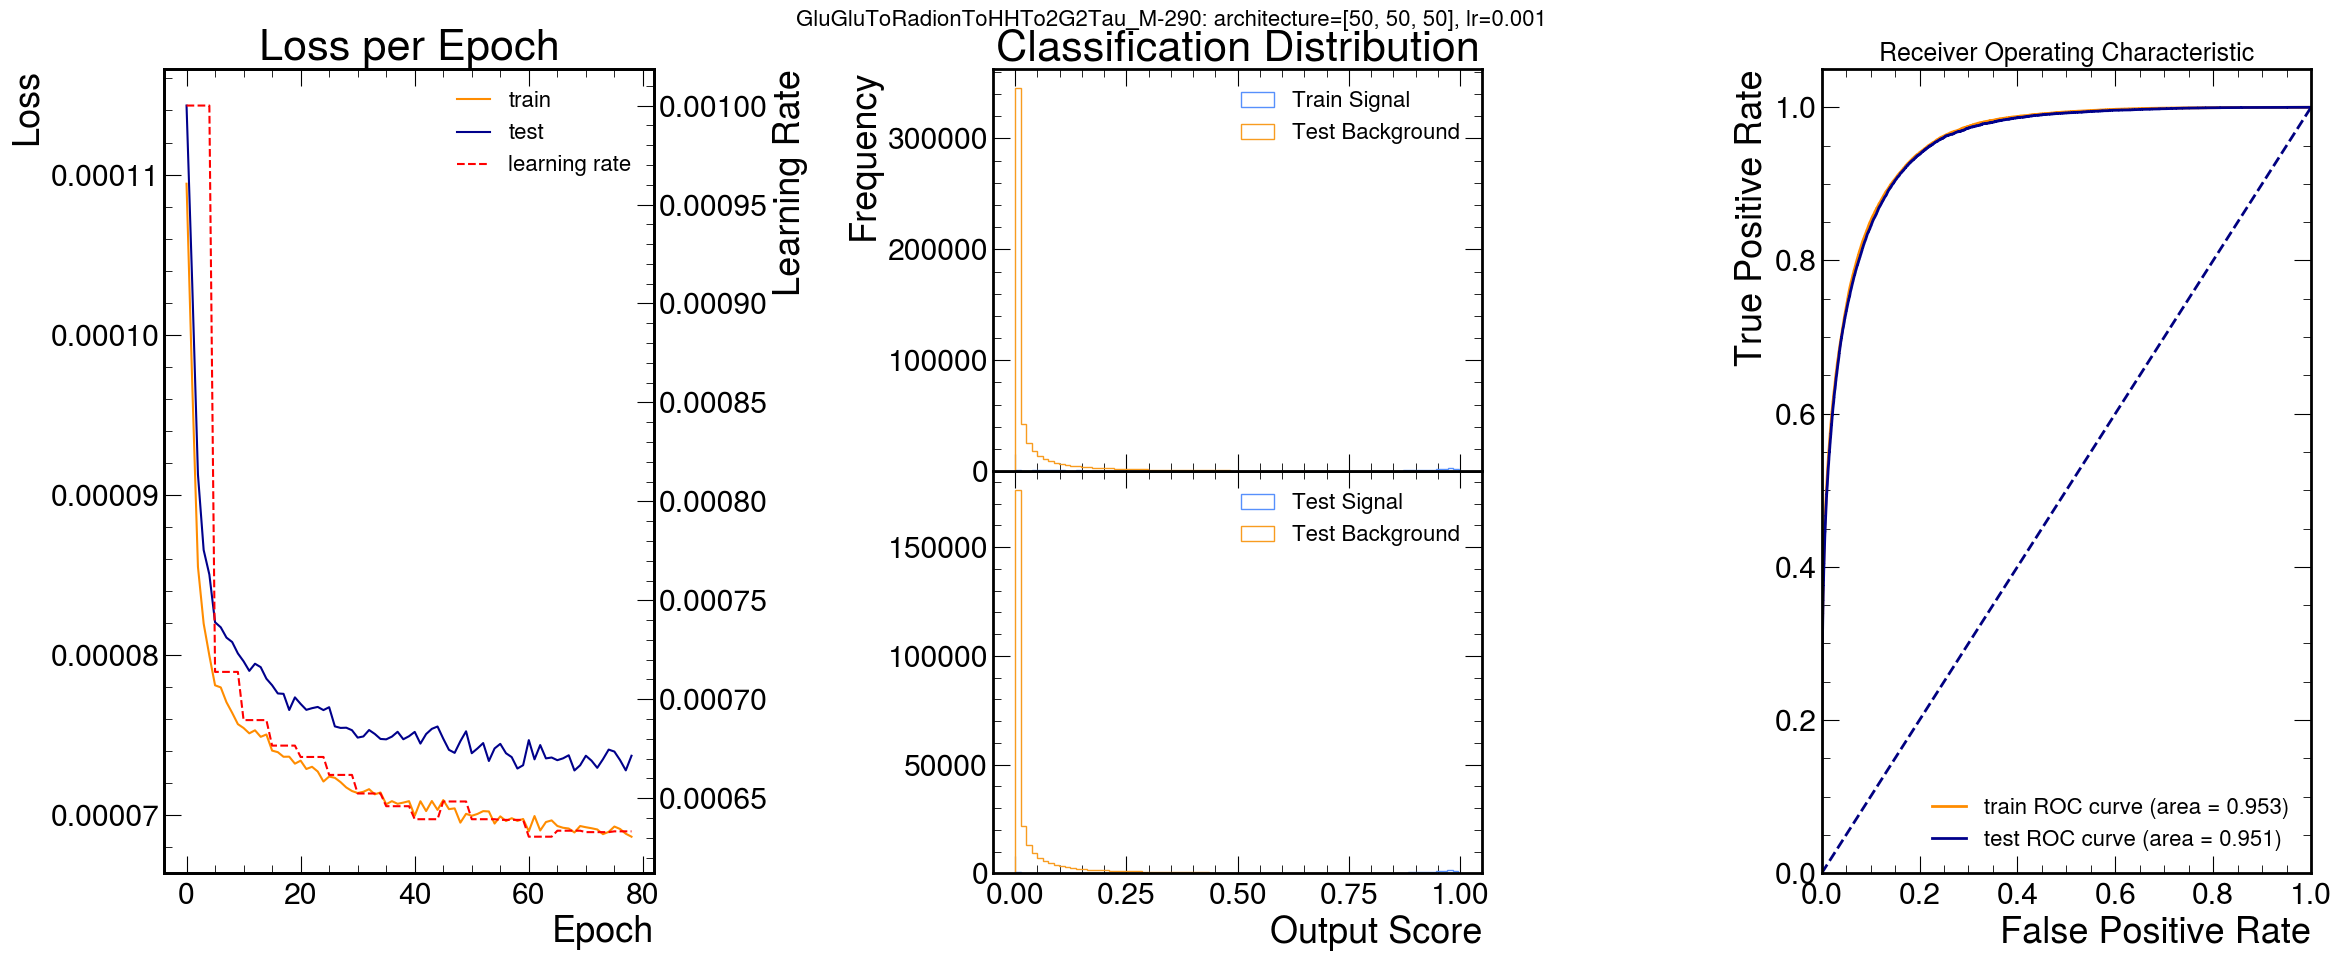

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Early stopping triggered
>> Training finished
Best model at epoch 54 with loss of 7.282524893525988e-05
Printing TRAINING AUC Score:0.9507134177378627 for signal GluGluToRadionToHHTo2G2Tau_M-300 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9485410138593222 for signal GluGluToRadionToHHTo2G2Tau_M-300 of architecture [50, 50, 50]


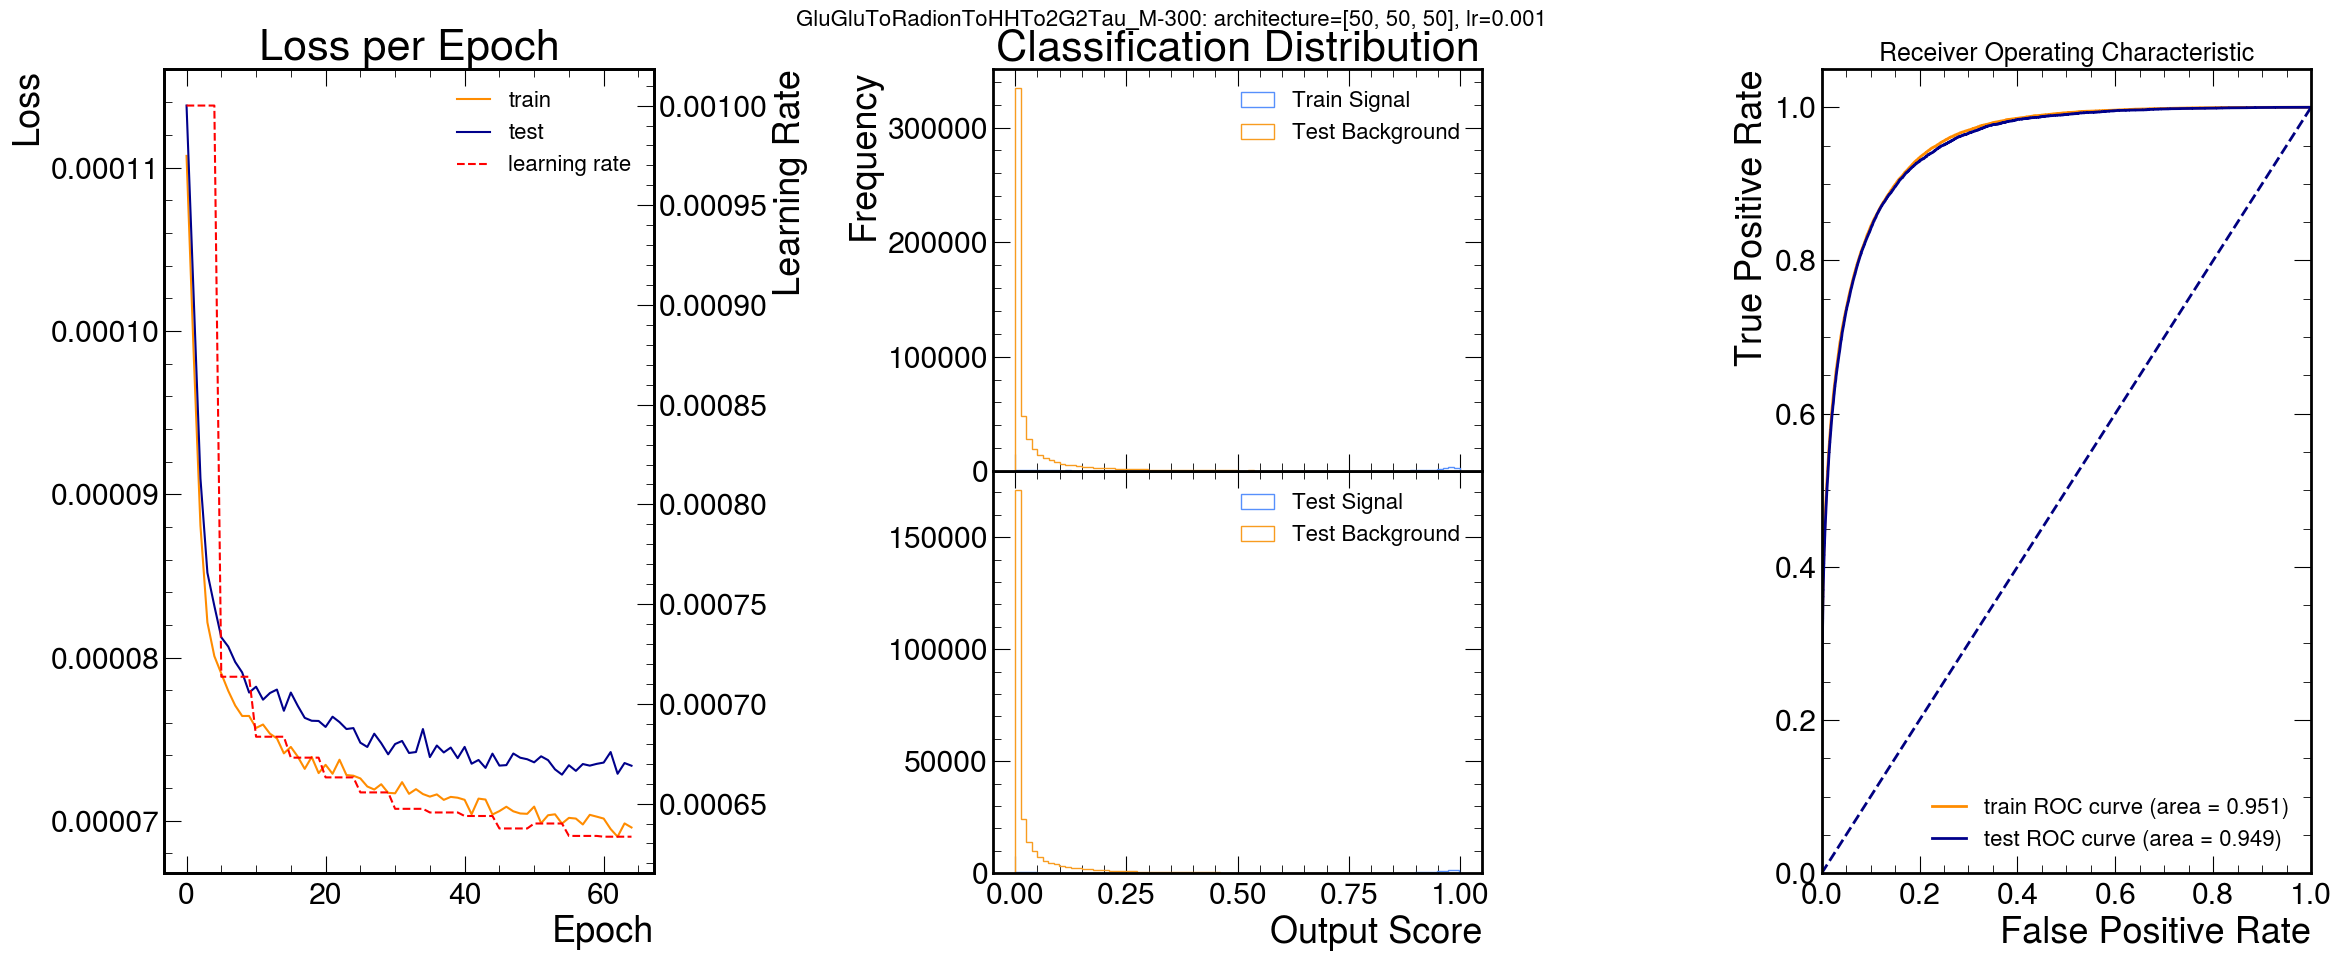

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Early stopping triggered
>> Training finished
Best model at epoch 45 with loss of 7.209755131043494e-05
Printing TRAINING AUC Score:0.9503779267983601 for signal GluGluToRadionToHHTo2G2Tau_M-320 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9495469391682363 for signal GluGluToRadionToHHTo2G2Tau_M-320 of architecture [50, 50, 50]


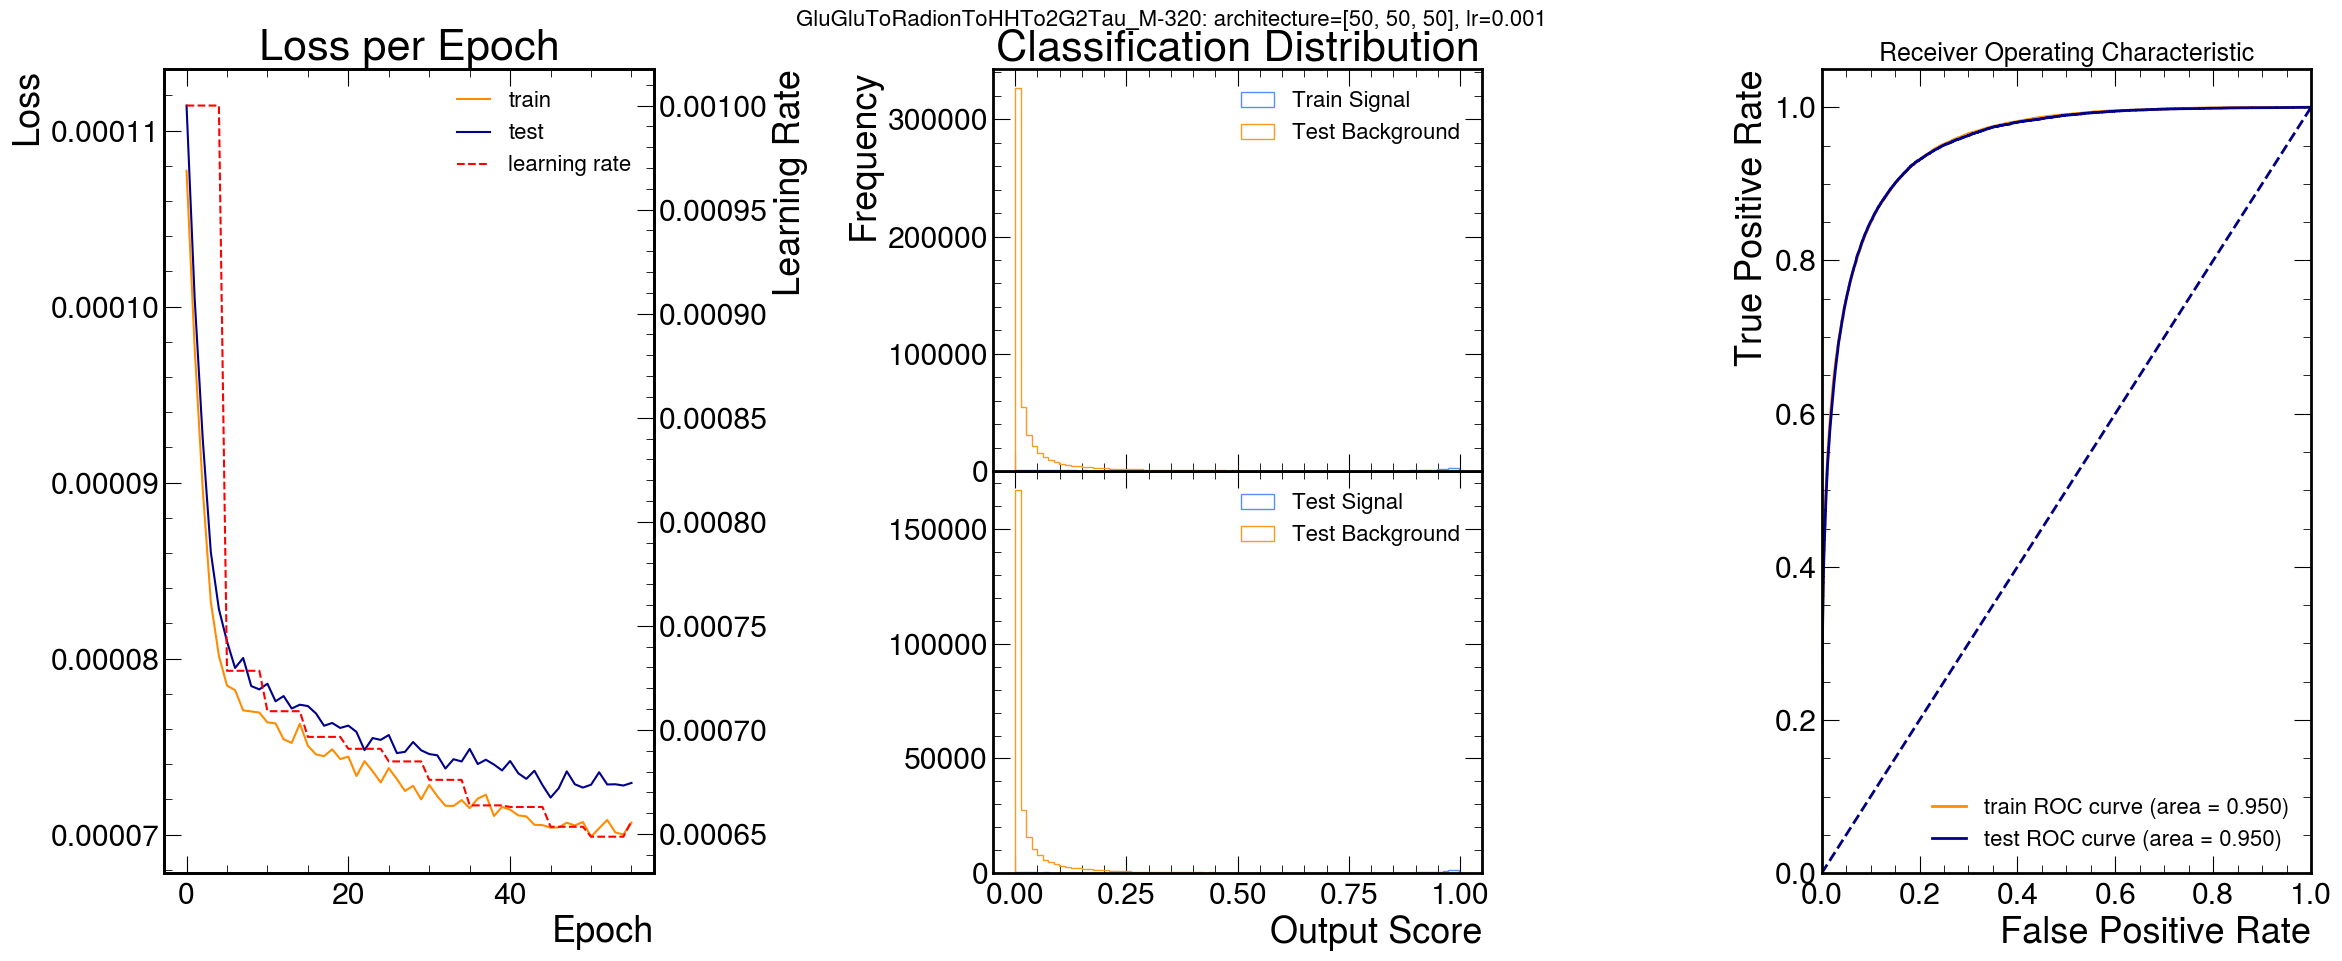

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Early stopping triggered
>> Training finished
Best model at epoch 47 with loss of 6.919710722286254e-05
Printing TRAINING AUC Score:0.9560792935105689 for signal GluGluToRadionToHHTo2G2Tau_M-350 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9546491387852143 for signal GluGluToRadionToHHTo2G2Tau_M-350 of architecture [50, 50, 50]


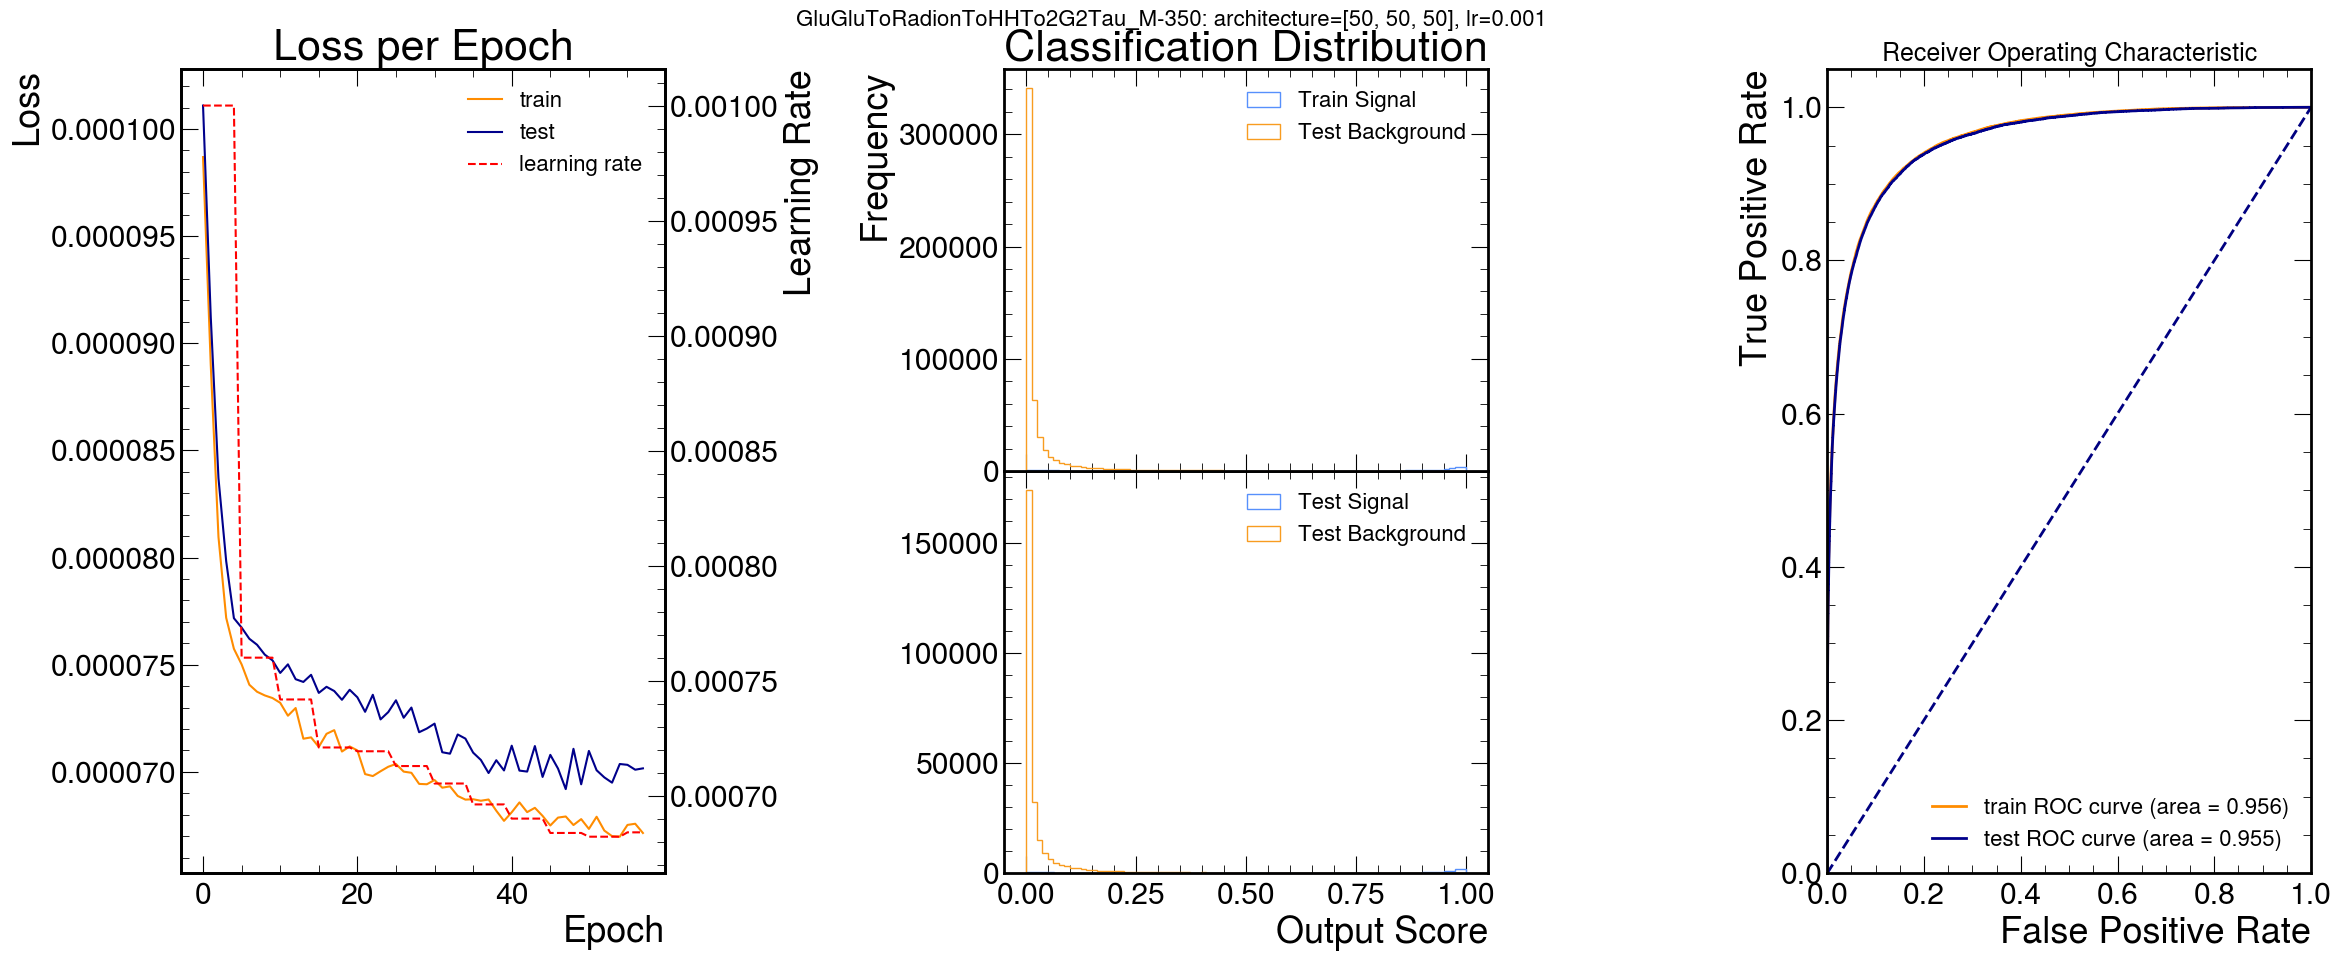

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Early stopping triggered
>> Training finished
Best model at epoch 47 with loss of 6.38576821074821e-05
Printing TRAINING AUC Score:0.9670601302124988 for signal GluGluToRadionToHHTo2G2Tau_M-400 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9663262831438229 for signal GluGluToRadionToHHTo2G2Tau_M-400 of architecture [50, 50, 50]


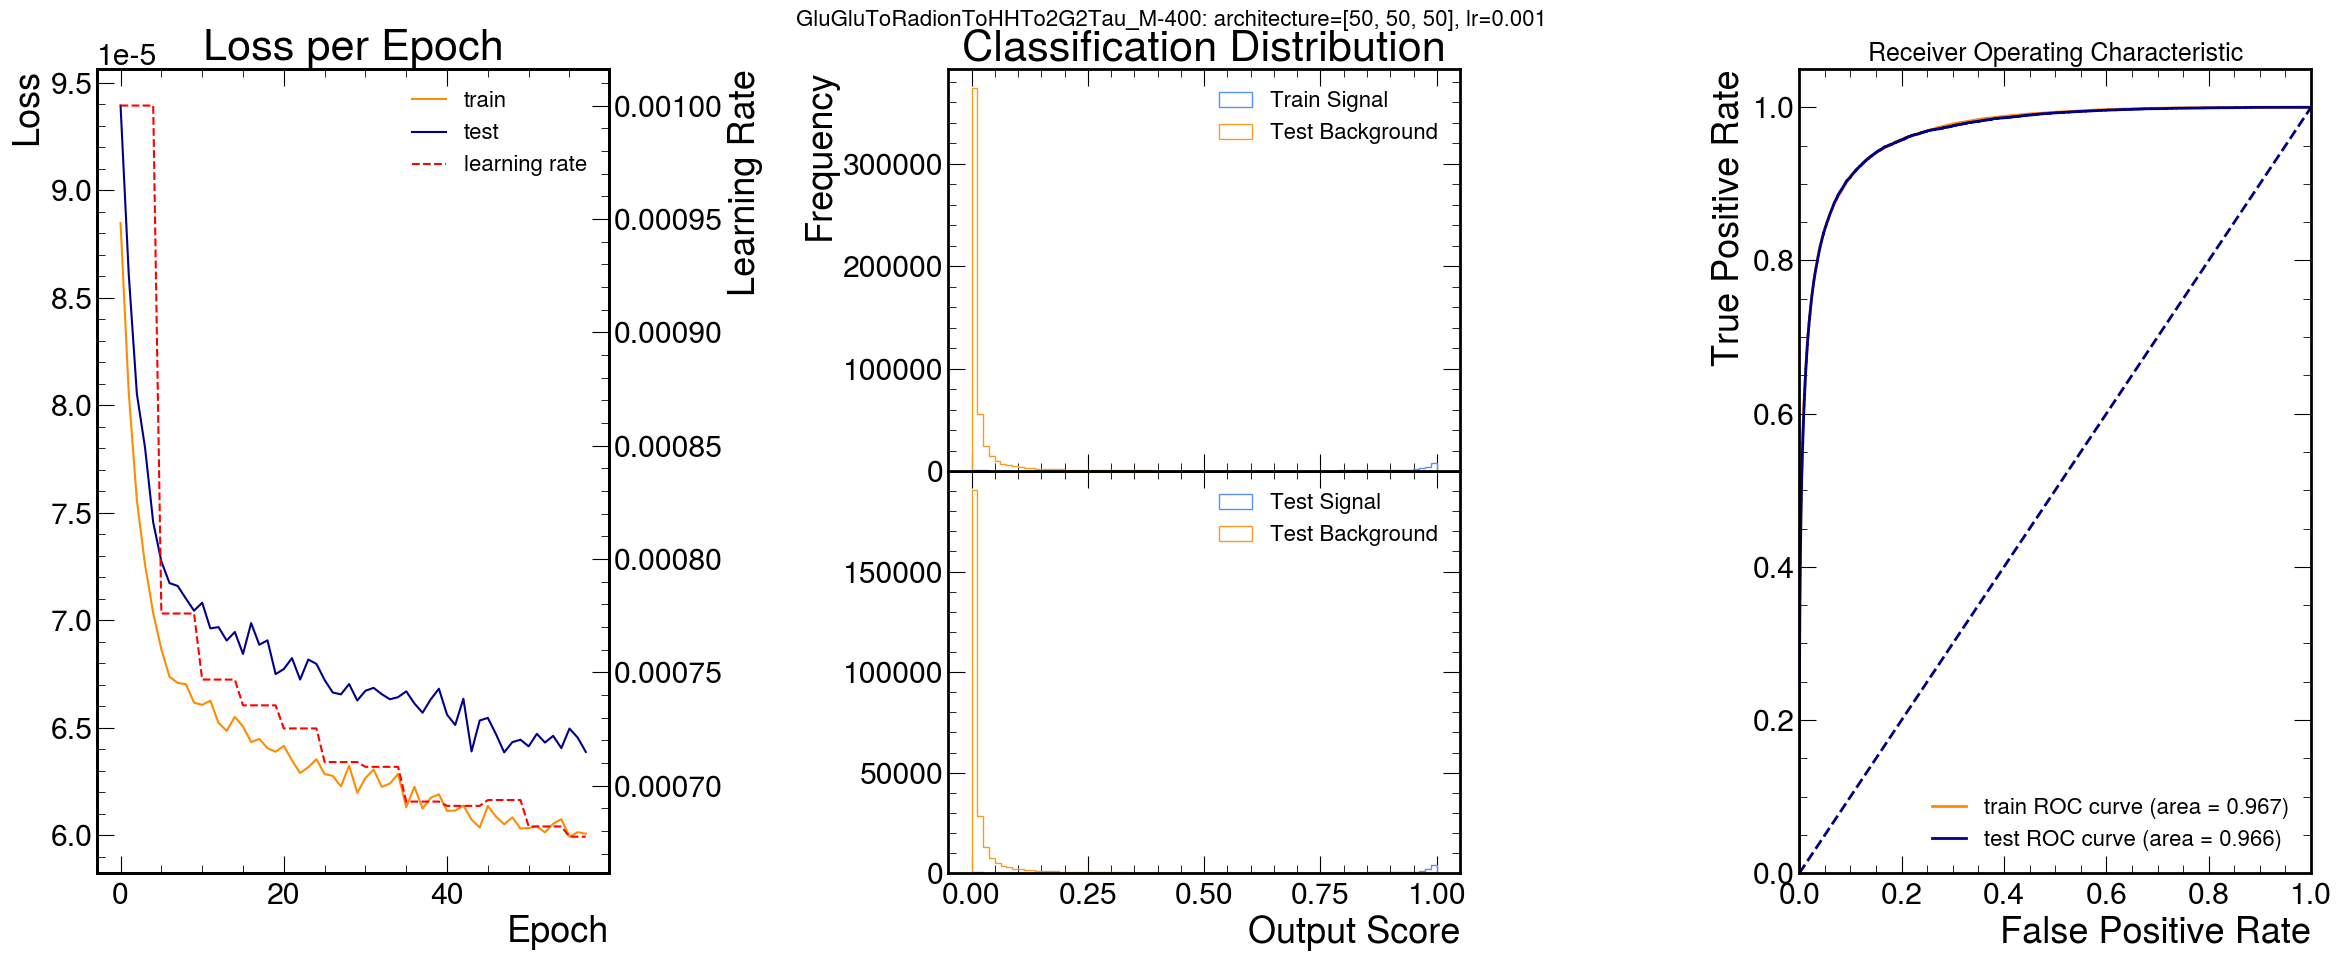

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Epoch: 80
Early stopping triggered
>> Training finished
Best model at epoch 76 with loss of 5.210935341892764e-05
Printing TRAINING AUC Score:0.9781801891903116 for signal GluGluToRadionToHHTo2G2Tau_M-450 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.976557147545356 for signal GluGluToRadionToHHTo2G2Tau_M-450 of architecture [50, 50, 50]


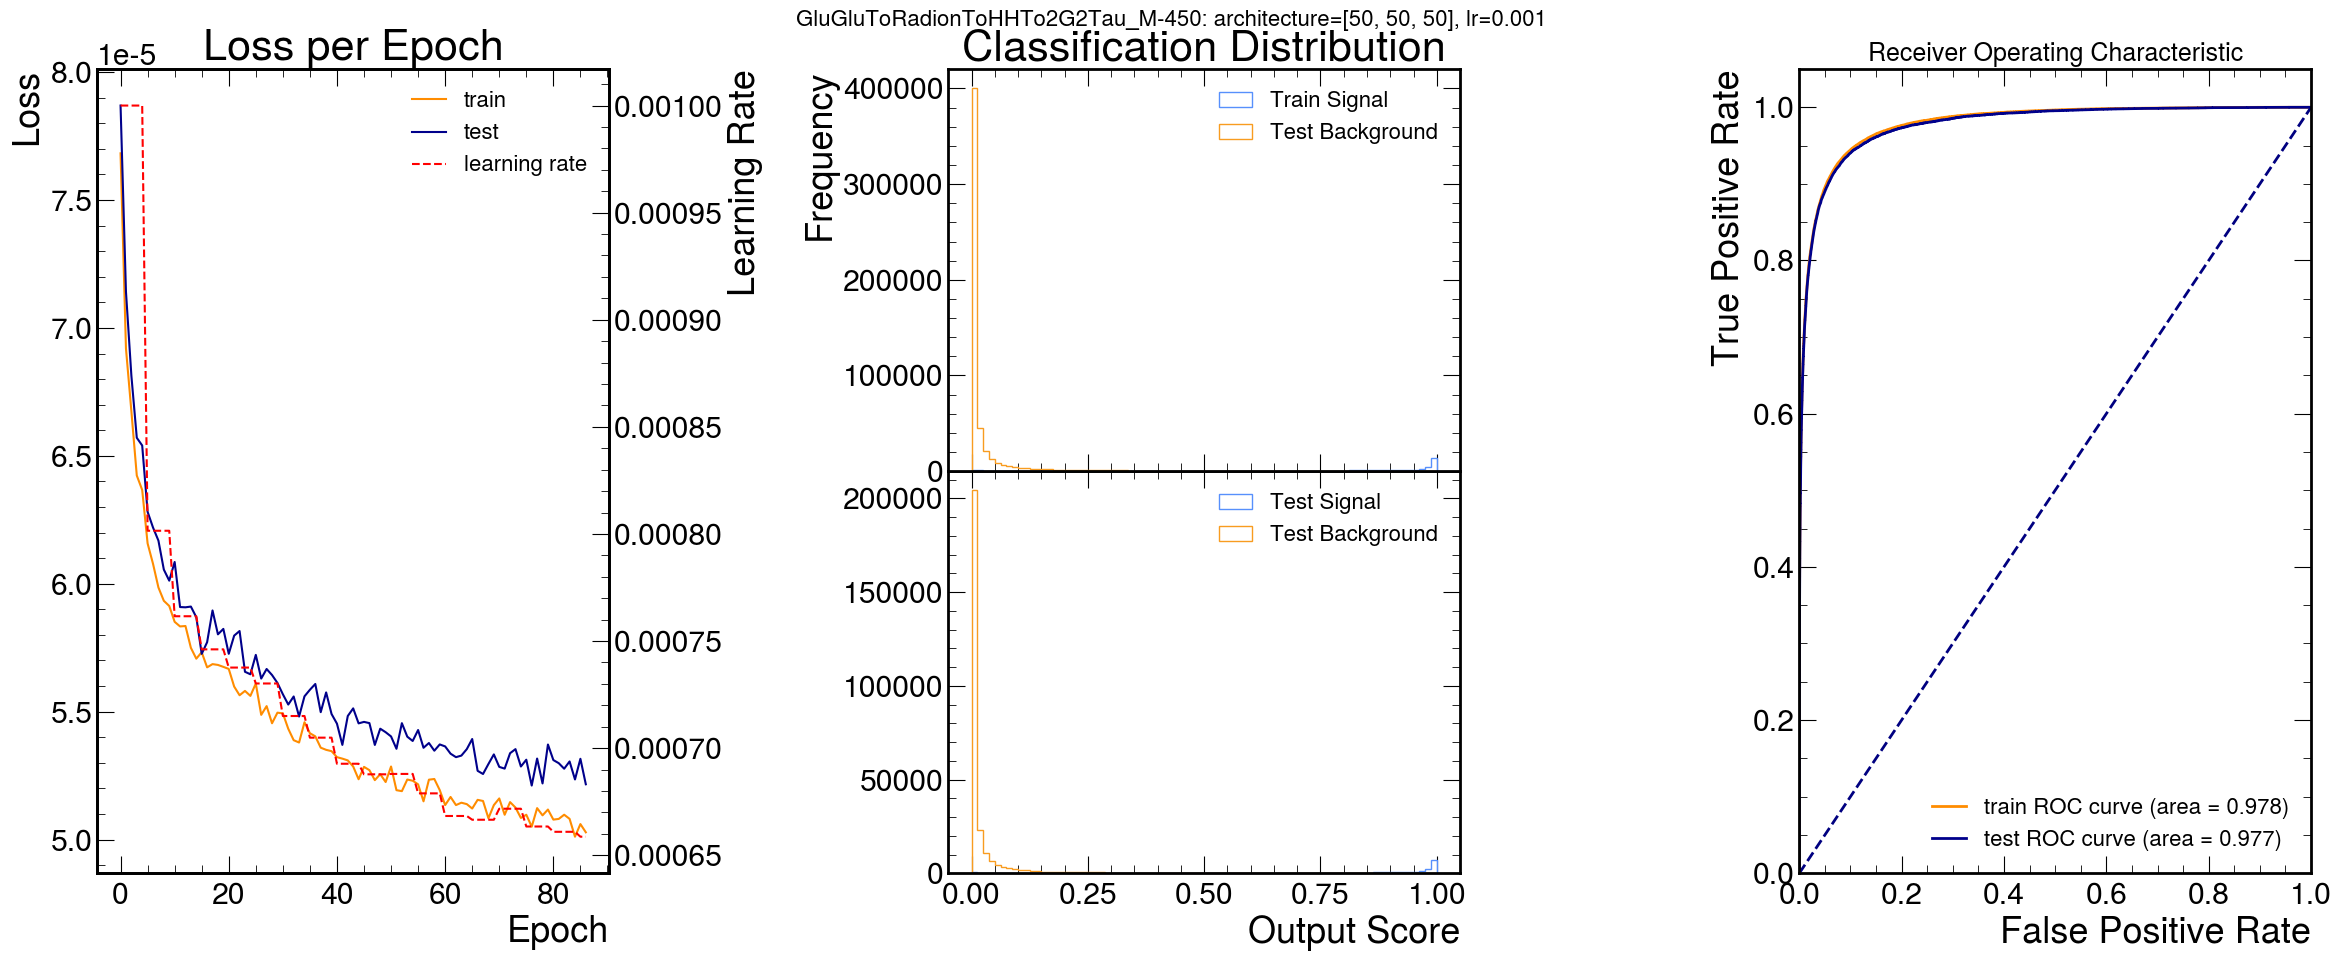

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Epoch: 80
Early stopping triggered
>> Training finished
Best model at epoch 87 with loss of 4.605371941579506e-05
Printing TRAINING AUC Score:0.9846536419714972 for signal GluGluToRadionToHHTo2G2Tau_M-500 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9832381508926227 for signal GluGluToRadionToHHTo2G2Tau_M-500 of architecture [50, 50, 50]


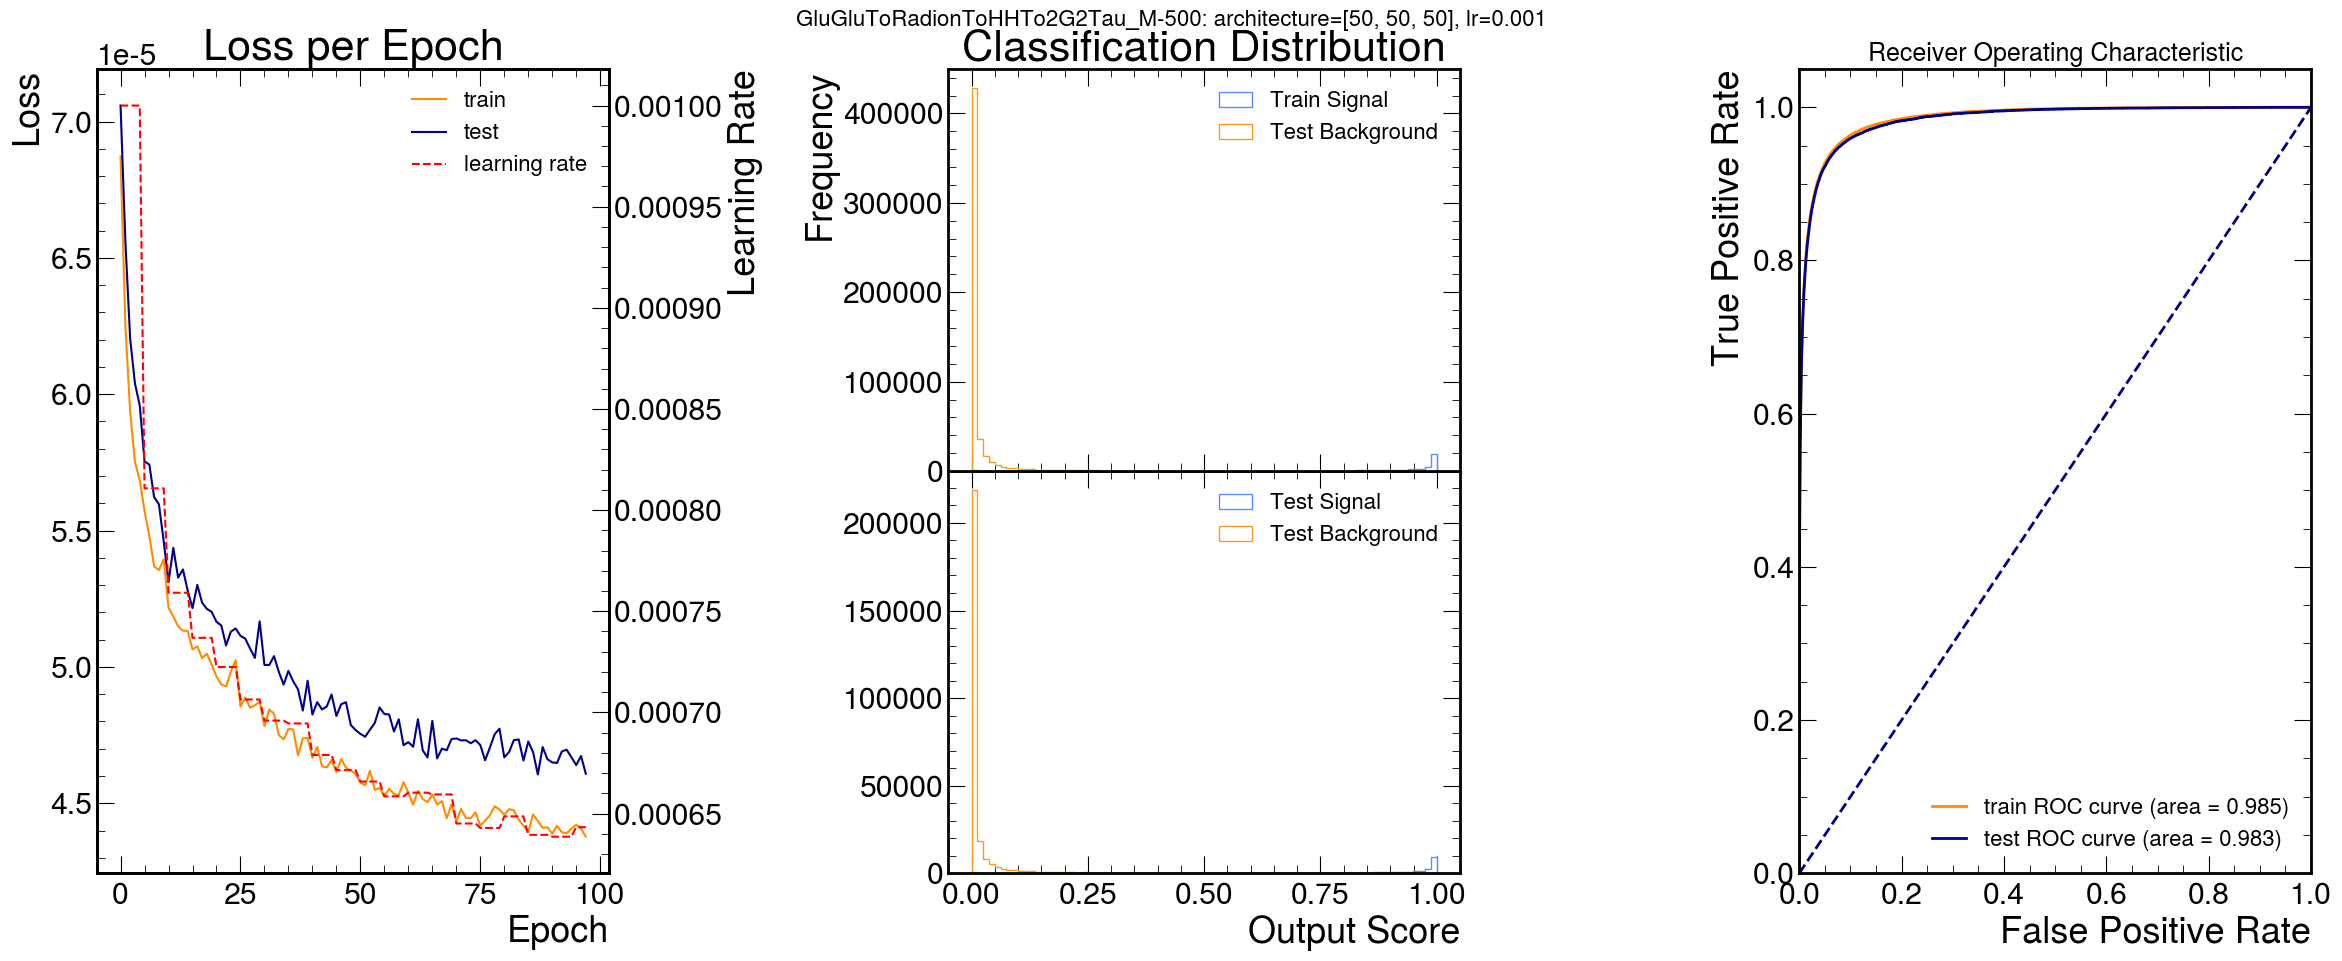

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Epoch: 80
Epoch: 100
Early stopping triggered
>> Training finished
Best model at epoch 90 with loss of 3.922332325601019e-05
Printing TRAINING AUC Score:0.9889318270518204 for signal GluGluToRadionToHHTo2G2Tau_M-550 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9877049163650542 for signal GluGluToRadionToHHTo2G2Tau_M-550 of architecture [50, 50, 50]


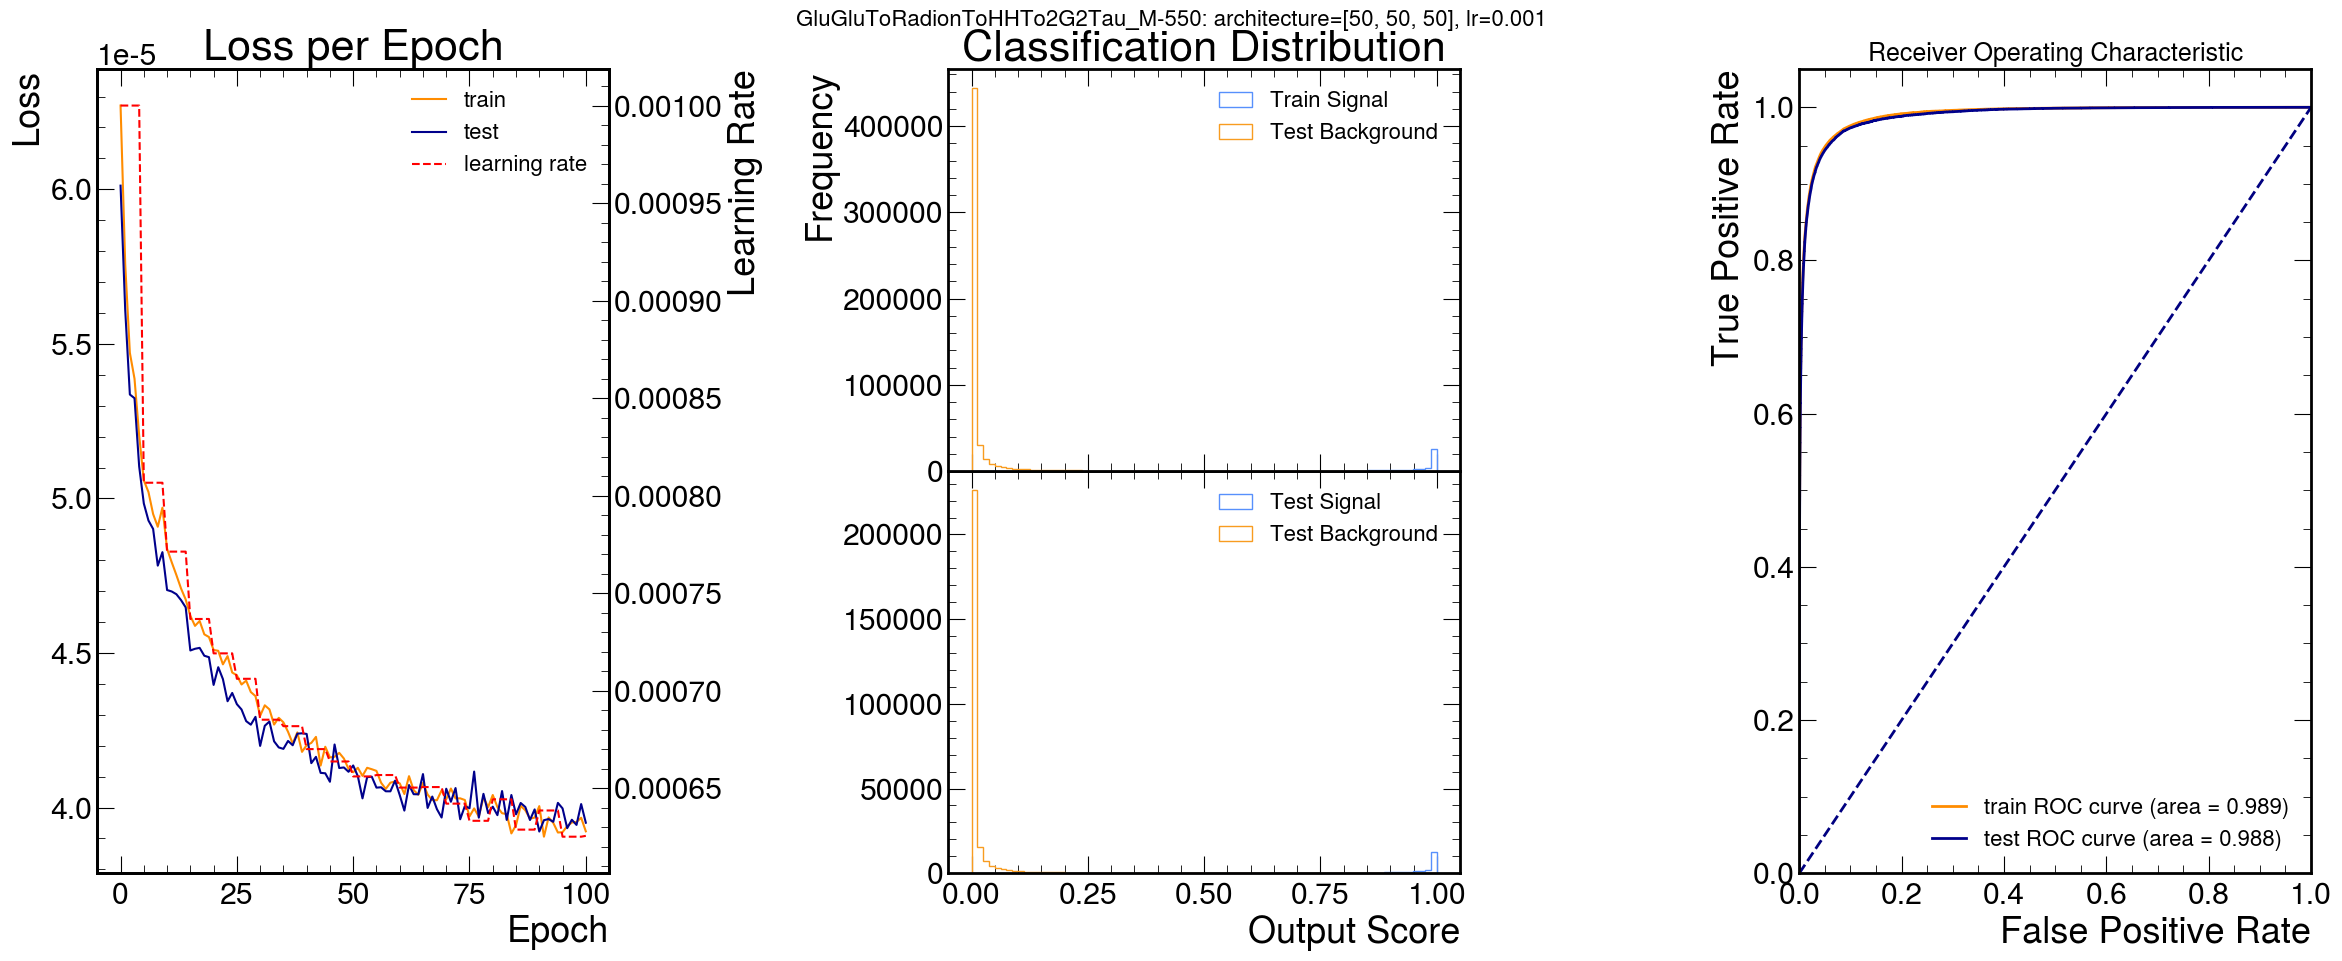

C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal['y']=np.ones(len(signal.index))
C:\Users\drpla\Desktop\ICL-PHYSICS-YEAR-4\Masters Project\GIT\CMS_Physics_PNN\Neural Networks\Final_Neural_Network\train_evaluate_GanelsClosest.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight_central'][y_train==0] *= (x_train['weight_central'][y_train==1].sum() / x_train['weight_central'][y_train==0].sum())
C

Epoch: 0
Epoch: 20
Epoch: 40
Epoch: 60
Epoch: 80
Early stopping triggered
>> Training finished
Best model at epoch 89 with loss of 3.451538577792235e-05
Printing TRAINING AUC Score:0.9920011270386193 for signal GluGluToRadionToHHTo2G2Tau_M-600 of architecture [50, 50, 50]
Printing TESTING AUC Score:0.9913871069866631 for signal GluGluToRadionToHHTo2G2Tau_M-600 of architecture [50, 50, 50]


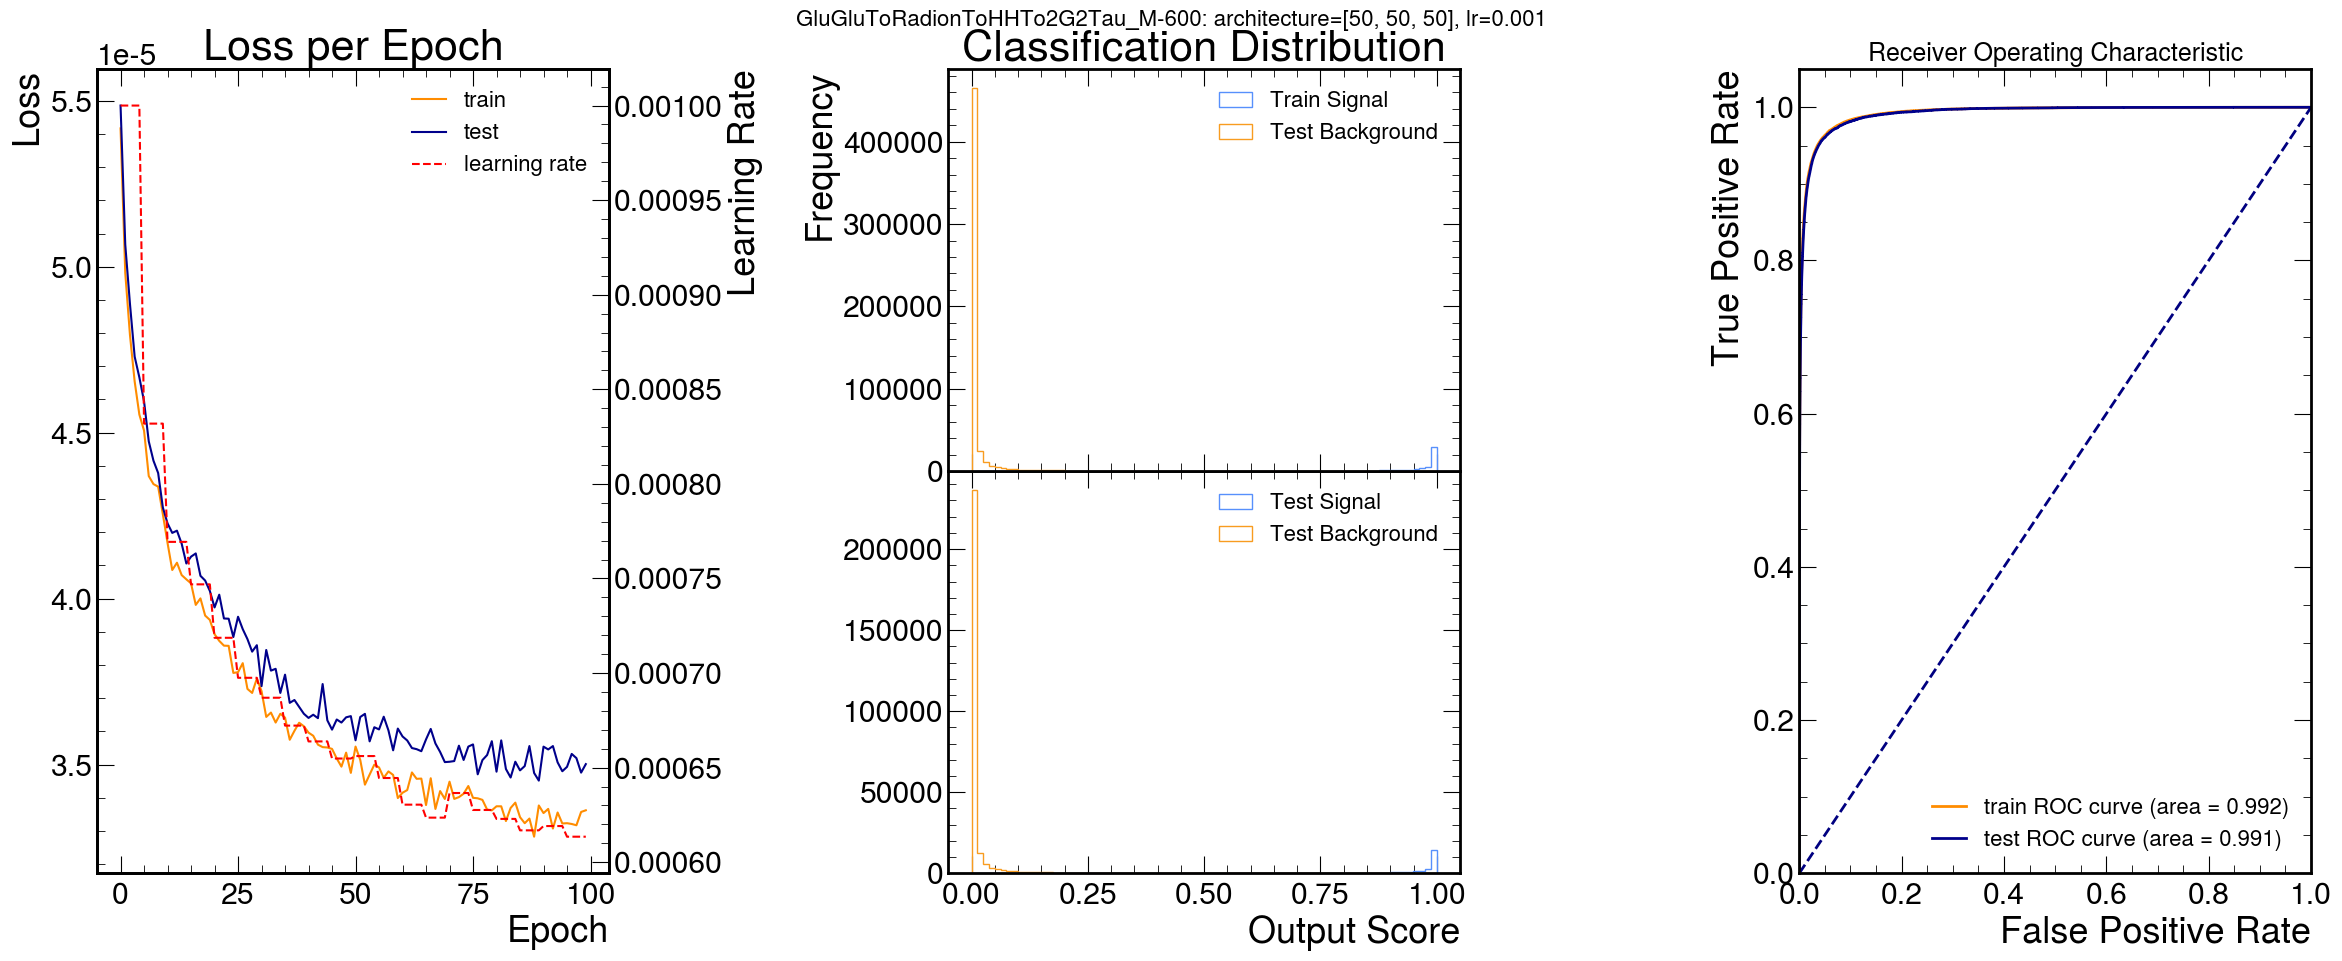

FileNotFoundError: [Errno 2] No such file or directory: 'merged_nominal.parquet'

In [3]:

architectures= [[50,50,50]] 

learningrate = 0.001

plot_learning_rate='yes'
scheduler_type='Custom'
top_number=27
               
all_features=pd.read_csv('ORDEREDFEATURESUITABILITY.csv')

allmasses=['260','270','280','290','300','320','350','400','450','500','550','600','650','700','750','800','900','1000']

for mass in allmasses:
    signal_names="GluGluToRadionToHHTo2G2Tau_M-"+mass #choose signal to analyse
    auclist=[]
    for nodes in architectures:
        feature_info = pd.read_csv("ROC_feature_info.csv")
        
        signal_df, background_df, combine_df, add_to_test_df = te.read_dataframes(signal_name = signal_names)
        
        x_train,x_test = te.getTrainTestSplit(combine_df,add_to_test_df)
        #x_train,x_test = te.getTrainTestSplit(combine_df)
        
        feature_list = all_features[signal_names].tolist()[0:top_number]
        
        
        epoch = 500
    #        models,epoch_loss_train,epoch_loss_test,output_score = te.trainNetwork(x_train, x_test, feature_list, 0.001, epoch = epoch, outdir=None, save_models=False, batch_size = 2048)
    
        models,epoch_loss_train,epoch_loss_test,output_score,output_score_train, learning_rate_epochs = te.trainNetwork_no_weights(x_train, x_test, feature_list, learningrate, epoch = epoch, outdir=None, save_models=False,
                            batch_size = 2048, nodes = nodes, model_type='char',scheduler_type=scheduler_type)        
        
        
        signal_output_score_train,background_output_score_train = separate_output_score(output_score_train,x_train['y'])
        signal_output_score_test,background_output_score_test = separate_output_score(output_score,x_test['y'])

        
        #training aucscore
        fpr_train, tpr_train, thresholds_train = roc_curve(x_train['y'], output_score_train.cpu().detach().numpy())
        roc_auc_train = auc(fpr_train, tpr_train)
        print(f'Printing TRAINING AUC Score:{roc_auc_train} for signal {signal_names} of architecture {(nodes)}')
        
        #testing aucscore
        fpr_test, tpr_test, thresholds_test = roc_curve(x_test['y'], output_score.cpu().detach().numpy())
        roc_auc_test = auc(fpr_test, tpr_test)
        print(f'Printing TESTING AUC Score:{roc_auc_test} for signal {signal_names} of architecture {(nodes)}')
        
        
        fig = plt.figure(figsize=(24, 10))
        gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

        ax0 = plt.subplot(gs[:, 0])
        ax2 = plt.subplot(gs[:, 2])
        ax3 = plt.subplot(gs[1, 1])
        ax1 = plt.subplot(gs[0, 1])



           
        line_train,=ax0.plot(epoch_loss_train, color='darkorange', label = 'train')
        line_test,=ax0.plot(epoch_loss_test, color='darkblue', label = 'test')
       # ax0.plot(label='learning rate',color='red')
        ax0.set_ylabel('Loss')
        ax0.set_xlabel('Epoch')
        ax0.set_title('Loss per Epoch')
       # ax0.legend(loc='upper right',fontsize=16)
        lines = [line_train,line_test]
        if plot_learning_rate == 'yes':
            ax1_twin = ax0.twinx()
            line_lr,=ax1_twin.plot(learning_rate_epochs, label='learning rate', linestyle='--', color='red')
            ax1_twin.set_ylabel('Learning Rate')
            ax1_twin.tick_params(axis='y')
            lines = [line_train,line_test,line_lr]
        
        labels = [line.get_label() for line in lines]
        ax1_twin.legend(lines, labels, loc='upper right', fontsize=16)    

            

        ax1.hist(signal_output_score_train, label = 'Train Signal',bins=80,histtype='step')
        ax1.hist(background_output_score_train, label = 'Test Background',bins=80,histtype='step')
       # ax1.set_xlabel("Output Score")
        ax1.set_title('Classification Distribution')
        ax1.set_ylabel("Frequency")
        ax1.legend(fontsize=16)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_xticklabels([])
        
        

        
        ax3.hist(signal_output_score_test, label = 'Test Signal',bins=80,histtype='step')
        ax3.hist(background_output_score_test, label = 'Test Background',bins=80,histtype='step')
        ax3.set_xlabel("Output Score")
        #ax3.set_title('Classification Distribution')
        #ax3.set_ylabel("Frequency")
        ax3.set_xlim([-0.05, 1.05])
        
        ax3.legend(fontsize=16)
        
        ax2.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'train ROC curve (area = {roc_auc_train:.3f})')
        ax2.plot(fpr_test, tpr_test, color='darkblue', lw=2, label=f'test ROC curve (area = {roc_auc_test:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('Receiver Operating Characteristic',fontsize=18)
        ax2.legend(loc="lower right",fontsize=16)
        
        plt.tight_layout()
        #plt.title(f'{signal_names[l]}')
        fig.suptitle(f'{signal_names}: architecture={nodes}, lr={learningrate}', fontsize=16)
        gs.update(hspace=0)
  #      plt.savefig(f'FinalNon_p_NN_PLOTS_DATA/a11022024plots_{mass}_arch={nodes}_init_lr={learningrate}.png')

        plt.show()
        #plt.savefig(f'savetrial1000.png')
    
        
        auclist.append([signal_names,roc_auc_test,nodes])
        
    featurescore_df = pd.DataFrame(auclist, columns=['signal', 'score', 'nodes per hidden layer'])
    
    #output_file_path = f'FinalNon_p_NN_PLOTS_DATA/a11022024plots_{mass}_arch={nodes}_init_lr={learningrate}.csv'
    #featurescore_df.to_csv(output_file_path, index=False)
         


In [ ]:

#SET NUMBER OF FEATURES HERE
num_of_features = 18



feature_list = []
sorted_features = {}

signal_masses = ["260","270","280","290","300","320","350","400","450","500","550","600","650","700","750","800","900"]

for signal_mass in signal_masses:
    signal = "GluGluToRadionToHHTo2G2Tau_M-"+signal_mass
    GluGluToRadionToHHTo2G2Tau_AUC_NN = pd.read_csv(f"Feature_list/{signal}_AUC_NN.csv", index_col = False, on_bad_lines='skip')
    dict_ = {GluGluToRadionToHHTo2G2Tau_AUC_NN.columns[i]:GluGluToRadionToHHTo2G2Tau_AUC_NN[GluGluToRadionToHHTo2G2Tau_AUC_NN.columns[i]][0] for i in range(len(GluGluToRadionToHHTo2G2Tau_AUC_NN.columns))}
    dict_ = {k: v for k, v in sorted(dict_.items(), key=lambda item: item[1], reverse=True)}
    list_ = list(dict_.keys())
    sorted_features[signal_mass] = list_


for sig in sorted_features.keys():
    for i in range(num_of_features):
        if sorted_features[sig][i] not in feature_list:
            feature_list.append(sorted_features[sig][i])

feature_list = feature_list #+ ['MX']
print(feature_list)